# 차트 데이터 

In [105]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [112]:
# 쿼리를 입력하면 db에 있는 데이터를 pandas DataFrame형태로 반환
def dbQuery(query):
    
    conn = pymysql.connect(host='zuzak.cvqcrkck1aqg.us-east-1.rds.amazonaws.com', user='getChan', password='cksdl951!!',db='zuzak', charset='euckr')
    q = query
    try:
        with conn.cursor() as cursor:
            df = pd.read_sql(q, con=conn)
            cursor.fetchall()
    finally:
        conn.close()
        return df

# DataFrame 전처리 함수.
def dfFilter(dataFrame):
    df = dataFrame.set_index("YYMMDD")
    df.ranking =pd.to_numeric(df.ranking)

    return df

# dataFrame 시각화
def dfPlot(dataFrame):
    dataFrame.plot()
    plt.gca().invert_yaxis()
    plt.ylabel('ranking')
    plt.show()


        ranking title    artist
YYMMDD                         
180327       80  지나오다  닐로(Nilo)
180328       57  지나오다  닐로(Nilo)
180329       47  지나오다  닐로(Nilo)
180330       39  지나오다  닐로(Nilo)
180331       40  지나오다  닐로(Nilo)
180401       31  지나오다  닐로(Nilo)
180402       29  지나오다  닐로(Nilo)
180403       27  지나오다  닐로(Nilo)
180404       24  지나오다  닐로(Nilo)
180405       21  지나오다  닐로(Nilo)
180406       20  지나오다  닐로(Nilo)
180407       20  지나오다  닐로(Nilo)
180408        8  지나오다  닐로(Nilo)
180409        2  지나오다  닐로(Nilo)
180410        2  지나오다  닐로(Nilo)
180411        1  지나오다  닐로(Nilo)
총 차트 진입일 = 16


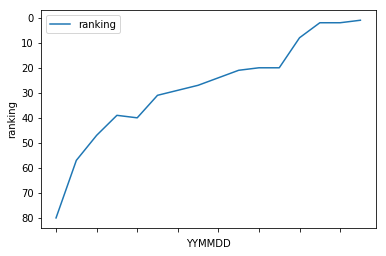

         ranking
count  16.000000
mean   28.000000
std    21.379118
min     1.000000
25%    17.000000
50%    25.500000
75%    39.250000
max    80.000000
         ranking
ranking      1.0


In [115]:
# 메인함수
if __name__ == "__main__":
    # 쿼리문 입력
    query = """ SELECT * FROM zuzak.genie where title = '지나오다' and YYMMDD<=180411; """
    
    Chartdf = dbQuery(query)
    Chartdf = dfFilter(Chartdf)
    
    # 쿼리결과 없으면
    if Chartdf.empty:
        print('결과 데이터가 없습니다.')
        
    # 쿼리 결과
    else :
        print(Chartdf)
        
        print('총 차트 진입일 = '+str(len(Chartdf)))
        
        #시각화
        dfPlot(Chartdf)

        #데이터 정보 출력
        print(Chartdf.describe())

        #데이터 피어슨 상관계수
        print(Chartdf.corr(method='pearson'))
        

# 네이버트렌드

In [108]:
#-*- coding: utf-8 -*-
import urllib.request
import json

                ratio
period               
2018-03-27   65.55814
2018-03-28   67.10442
2018-03-29   68.82016
2018-03-30   73.96737
2018-03-31  100.00000
2018-04-01   88.43465
2018-04-02   58.97055
2018-04-03   62.08430
2018-04-04   62.82567
2018-04-05   64.47786
2018-04-06   71.10781
2018-04-07   92.71340
2018-04-08   84.11353
2018-04-09   58.58928
2018-04-10   54.64943
2018-04-11   57.72082
결과 레코드 수 = 16


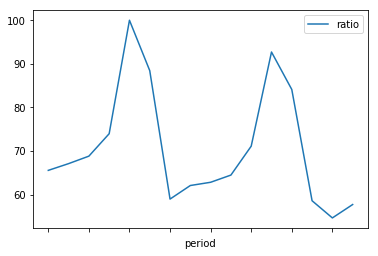

            ratio
count   16.000000
mean    70.696087
std     13.605251
min     54.649430
25%     61.305863
50%     66.331280
75%     76.503910
max    100.000000
       ratio
ratio    1.0


In [116]:
def NaverTrend():
    client_id = "_X9iNbtxufWnpoN9n0gx"
    client_secret = "xUdZWWvtJJ"
    url = "https://openapi.naver.com/v1/datalab/search";

    body = """{
            \"startDate\":\"2018-03-27\",
            \"endDate\":\"2018-04-11\",
            \"timeUnit\":\"date\",
            \"keywordGroups\":
                [
                    {
                    \"groupName\":\"그날처럼\",
                    \"keywords\":
                        [
                        \"그날처럼\"
                        ]
                    }
                ]
            }""";

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
    else:
        print("Error Code:" + rescode)

        
    # plotting
    naver = response_body
    jsondata = json.loads(naver.decode())
    
    # 검색 데이터 필터링
    tmp = jsondata['results'][0]['data']
    df = pd.DataFrame(tmp)
    df.index = df.period
    del df['period']
    
    return df
    
    # 메인함수
if __name__ == "__main__":
    Naverdf = NaverTrend()
    print(Naverdf)
    print('결과 레코드 수 = '+str(len(Naverdf)))
    Naverdf.plot()
    plt.show()

    #데이터 정보 출력
    print(Naverdf.describe())

    #데이터 피어슨 상관계수
    print(Naverdf.corr(method='pearson'))


# 상관분석

In [117]:
# 데이터프레임 합치기
def MergeData(naver, chart):
    # Naverdf 조정
    naver.rename(columns={'period':'YYMMDD', 'ratio':'naver'}, inplace=True)
    naver['YYMMDD']
    
    
if __name__=='__main__':
    MergeData(Naverdf, Chartdf)

AttributeError: 'DataFrame' object has no attribute 're'